In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox, yeojohnson
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor



In [57]:
df = pd.read_csv("/content/Copper_Set.xlsx - Result 1.csv")
df

<ipython-input-57-7f6327245bd6>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Copper_Set.xlsx - Result 1.csv")


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [58]:
df1 = df.drop(['item_date','material_ref',"delivery date",'id'],axis = 1)

In [59]:
df2 = df1[df1['status'].isin(['Won','Lost'])]

In [ ]:
def convert_to_float(x):
  try:
    return round(float(x), 2)
  except ValueError:
    return None

df2['quantity tons'] = df2['quantity tons'].apply(convert_to_float)

In [ ]:
df2.drop(df2[df2['quantity tons'] <0].index, inplace=True)
df2

In [ ]:
df2.dropna(inplace=True)
df2

In [63]:
skewness_values = df2.skew()
skewness_values

<ipython-input-63-7b77c91f75ae>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness_values = df2.skew()


quantity tons     53.808427
customer        -155.467757
country            0.708337
application        0.751013
thickness        288.704760
width              0.352768
product_ref        1.013431
selling_price    141.327091
dtype: float64

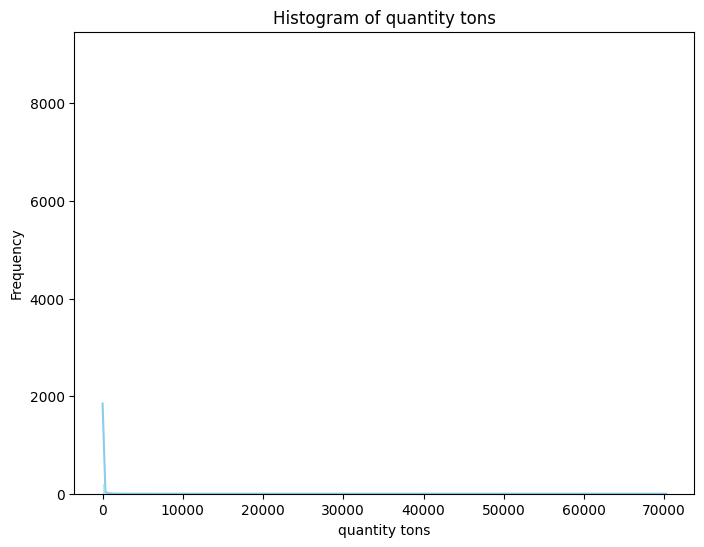

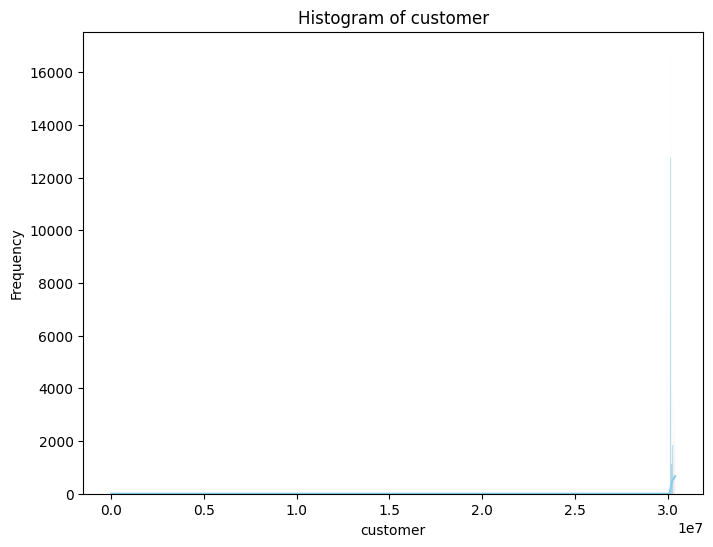

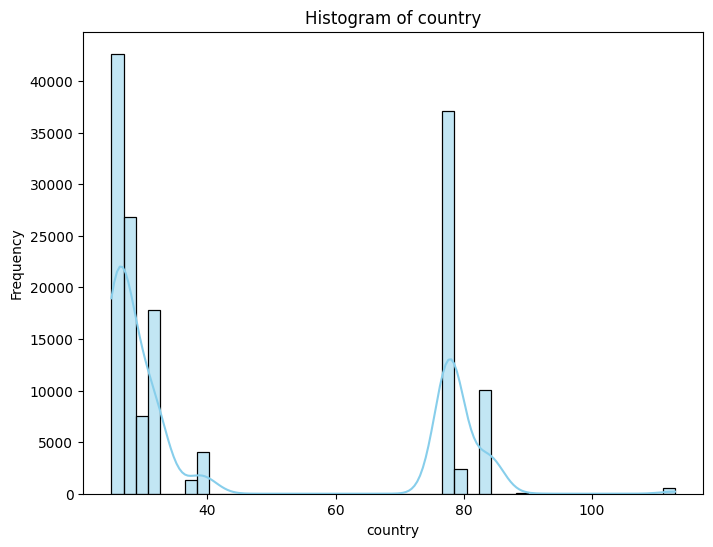

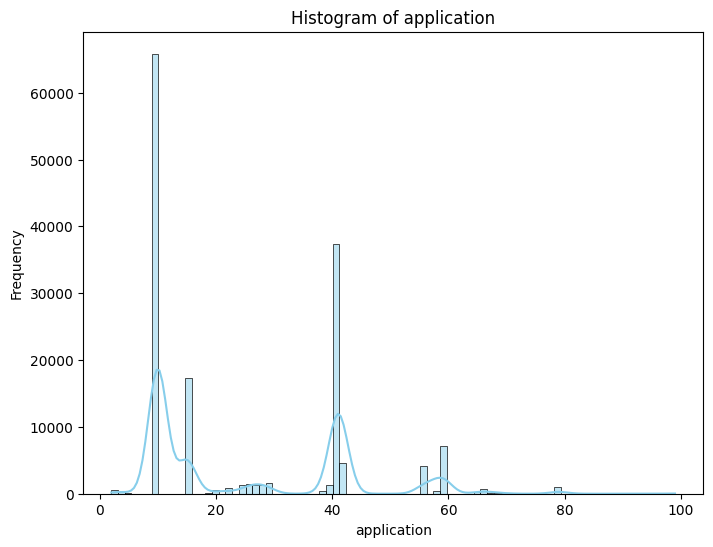

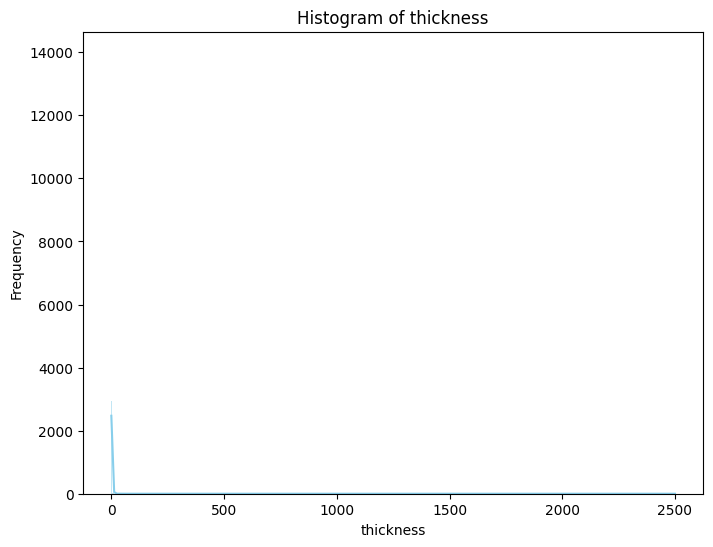

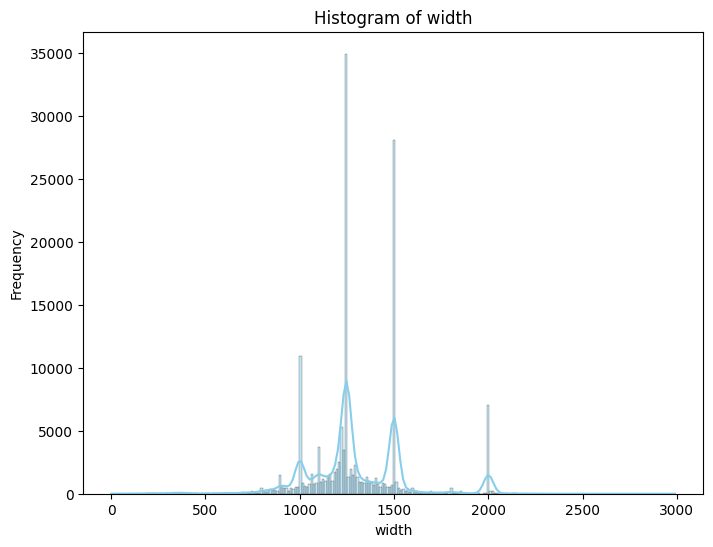

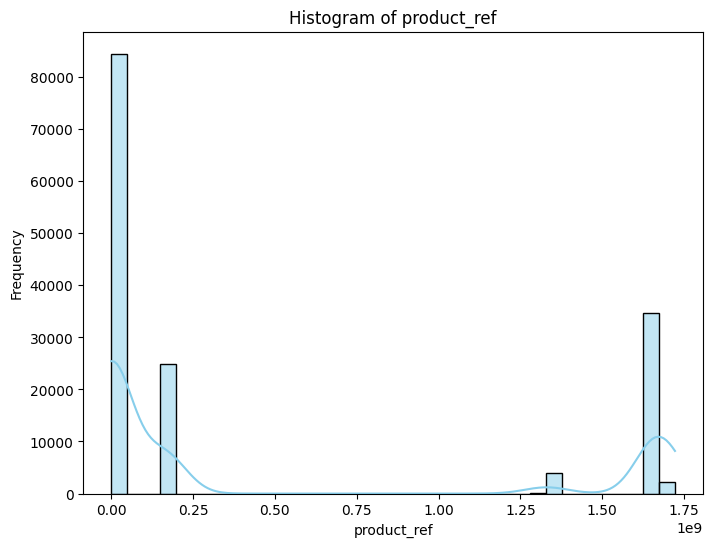

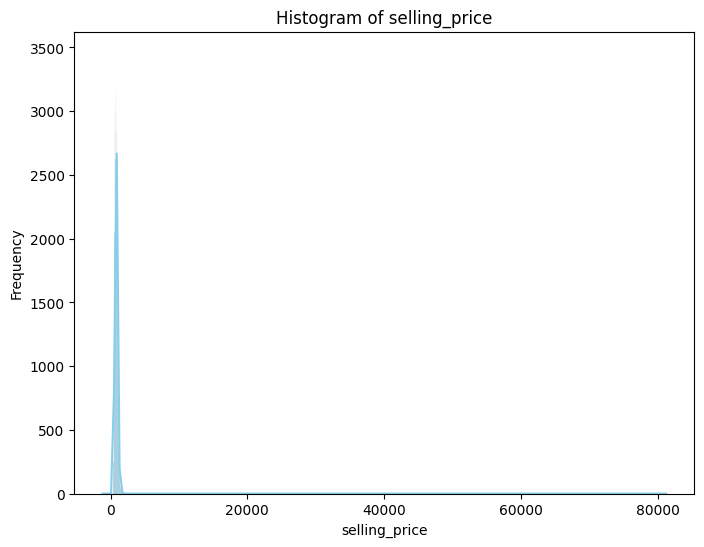

In [65]:
# visualization of skewness
import seaborn as sns
import matplotlib.pyplot as plt

high_skew_columns = skewness_values[skewness_values.abs() > 0].index

for column in high_skew_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df2[column], kde=True, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
transformed_data, lambda_value = yeojohnson(df2['quantity tons'])
df2['quantity tons'] = transformed_data

In [67]:
transformed_data, lambda_value = yeojohnson(df2['thickness'])
df2['thickness'] = transformed_data

<ipython-input-67-fd4b18d40db1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['thickness'] = transformed_data


In [68]:
transformed_data, lambda_value = yeojohnson(df2['customer'])
df2['customer'] = transformed_data

<ipython-input-68-e244ebbe70cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['customer'] = transformed_data


In [69]:
df2

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,3.437193,5.267791e+73,28.0,Won,W,10.0,0.766789,1500.0,1670798778,854.00
1,5.170485,5.349734e+73,25.0,Won,W,41.0,0.481984,1210.0,1668701718,1047.00
2,4.753148,5.263700e+73,30.0,Won,WI,28.0,0.288394,952.0,628377,644.33
3,4.340758,5.614950e+73,32.0,Won,S,59.0,0.809562,1317.0,1668701718,768.00
4,5.183795,5.365011e+73,28.0,Won,W,10.0,0.966058,2000.0,640665,577.00
...,...,...,...,...,...,...,...,...,...,...
181667,3.912682,5.346048e+73,25.0,Won,W,41.0,0.536797,1240.0,164141591,602.00
181668,3.884501,5.346048e+73,25.0,Won,W,41.0,0.536797,1220.0,164141591,591.00
181669,4.358840,5.346048e+73,25.0,Won,W,41.0,0.533596,1500.0,164141591,589.00
181670,1.552579,5.346048e+73,25.0,Won,W,41.0,0.447359,1250.0,164141591,619.00


In [70]:
skewness_values = df2.skew()
skewness_values

<ipython-input-70-7b77c91f75ae>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness_values = df2.skew()


quantity tons     -0.006750
customer           0.440370
country            0.708337
application        0.751013
thickness          0.164176
width              0.352768
product_ref        1.013431
selling_price    141.327091
dtype: float64

In [71]:
df2['item type'] = df2['item type'].map({"W":1,"S":2,"PL":3,"WI":4,"IPL":5,"SLAWR":6,"Others":7})

<ipython-input-71-070815e613b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['item type'] = df2['item type'].map({"W":1,"S":2,"PL":3,"WI":4,"IPL":5,"SLAWR":6,"Others":7})


In [72]:
df2['status'] = df2['status'].map({"Won":1,"Lost":0})

<ipython-input-72-ad796df5f628>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['status'] = df2['status'].map({"Won":1,"Lost":0})


In [73]:
df2

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,3.437193,5.267791e+73,28.0,1,1,10.0,0.766789,1500.0,1670798778,854.00
1,5.170485,5.349734e+73,25.0,1,1,41.0,0.481984,1210.0,1668701718,1047.00
2,4.753148,5.263700e+73,30.0,1,4,28.0,0.288394,952.0,628377,644.33
3,4.340758,5.614950e+73,32.0,1,2,59.0,0.809562,1317.0,1668701718,768.00
4,5.183795,5.365011e+73,28.0,1,1,10.0,0.966058,2000.0,640665,577.00
...,...,...,...,...,...,...,...,...,...,...
181667,3.912682,5.346048e+73,25.0,1,1,41.0,0.536797,1240.0,164141591,602.00
181668,3.884501,5.346048e+73,25.0,1,1,41.0,0.536797,1220.0,164141591,591.00
181669,4.358840,5.346048e+73,25.0,1,1,41.0,0.533596,1500.0,164141591,589.00
181670,1.552579,5.346048e+73,25.0,1,1,41.0,0.447359,1250.0,164141591,619.00


In [74]:
 df3 = df2.drop('customer', axis=1)

In [75]:
df3

,quantity tons,country,status,item type,application,thickness,width,product_ref,selling_price
0,3.437193,28.0,1,1,10.0,0.766789,1500.0,1670798778,854.00
1,5.170485,25.0,1,1,41.0,0.481984,1210.0,1668701718,1047.00
2,4.753148,30.0,1,4,28.0,0.288394,952.0,628377,644.33
3,4.340758,32.0,1,2,59.0,0.809562,1317.0,1668701718,768.00
4,5.183795,28.0,1,1,10.0,0.966058,2000.0,640665,577.00
...,...,...,...,...,...,...,...,...,...
181667,3.912682,25.0,1,1,41.0,0.536797,1240.0,164141591,602.00
181668,3.884501,25.0,1,1,41.0,0.536797,1220.0,164141591,591.00
181669,4.358840,25.0,1,1,41.0,0.533596,1500.0,164141591,589.00
181670,1.552579,25.0,1,1,41.0,0.447359,1250.0,164141591,619.00


In [76]:
# Create a StandardScaler object
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df3)

In [77]:
# Separate features and target variable
# building for classification model
X = df3.drop('status', axis=1)
y = df3['status']

In [78]:
# Print class distribution before oversampling
print("Class distribution before oversampling:")
print(Counter(y))

Class distribution before oversampling:
Counter({1: 116005, 0: 34433})


In [79]:
# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print class distribution after oversampling
print("Class distribution after oversampling:")
print(Counter(y_resampled))

Class distribution after oversampling:
Counter({1: 116005, 0: 116005})


In [80]:
# BUILDING A CLASSIFICATION MACHINE LEARNING MODEL-RANDOM FOREST
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [81]:
# Create a Random Forest classifier
# You can customize the parameters as needed (e.g., n_estimators, max_depth, etc.)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model on the scaled training data
rf_classifier.fit(X_train, y_train)
# Make predictions on the scaled test data
y_pred = rf_classifier.predict(X_test)
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.938687987586742
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     23336
           1       0.94      0.93      0.94     23066

    accuracy                           0.94     46402
   macro avg       0.94      0.94      0.94     46402
weighted avg       0.94      0.94      0.94     46402



In [82]:

#TESTING WITH REAL VALUES
XTEST = [5.17,25.00,1,41.00,0.48,1210.00,1668701718,1047.00]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_TEST_scaled = scaler.transform([XTEST])
y_pred= rf_classifier.predict(X_TEST_scaled)

print(y_pred)                                                                  #3.44

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#CREATING A REGRESSION MODEL
x = df3.drop('selling_price', axis=1)
y = df3['selling_price']
# Scale the data to have mean=0 and variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
# Split the scaled data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Create a Random Forest Regressor
model1 = RandomForestRegressor(
    n_estimators=100,     # Number of trees in the forest
    criterion='squared_error',  # Mean squared error as the criterion for splitting
    max_depth=None,       # Maximum depth of the trees (None means unlimited)
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,   # Minimum number of samples required to be at a leaf node
    n_jobs=-1,            # Number of CPU cores to use (-1 uses all available cores)
    random_state=42       # Seed for reproducibility
)
# Fit the model to the training data
model1.fit(X1_train, y1_train)
# Make predictions on the test data
y_pred = model1.predict(X1_test)
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate the model
mse = mean_squared_error(y1_test, y_pred)
r2 = r2_score(y1_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


In [98]:
#TESTING WITH REAL VALUES
X1TEST = [4.75,30.00,1,4,28.00,0.29,952.00,628377]

scaler = StandardScaler()
X1_train_scaled = scaler.fit(X1_train)
X1_train_scaled = scaler.transform(X1_train)

X1_TEST_scaled = scaler.transform([X1TEST])
model1 = RandomForestRegressor(
    n_estimators=100,     # Number of trees in the forest
    criterion='squared_error',  # Mean squared error as the criterion for splitting
    max_depth=None,       # Maximum depth of the trees (None means unlimited)
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,   # Minimum number of samples required to be at a leaf node
    n_jobs=-1,            # Number of CPU cores to use (-1 uses all available cores)
    random_state=42       # Seed for reproducibility
)
model1.fit(X1_train_scaled, y1_train)

y1_pred = model1.predict(X1_TEST_scaled)

print(y1_pred)

[655.5567]


In [87]:
# pickling module
# step -1
import pandas as pd
import pickle


In [88]:
# step -2
# Pickle the DataFrame
filename = '/content/df3.pickle'  # Use an appropriate file path in Colab
with open(filename, 'wb') as file:
    pickle.dump(df3, file)

print("DataFrame pickled successfully.")


DataFrame pickled successfully.
